In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# ฟังก์ชันโหลดเสียงและแปลงเป็น Mel Spectrogram
def extract_features(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)
        if y is None or len(y) == 0:
            raise ValueError(f"ไฟล์ {audio_file} ไม่มีข้อมูลเสียง")

        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        return log_mel_spec
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการโหลดไฟล์ {audio_file}: {e}")
        return None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

music_dir = "/content/drive/MyDrive/music_wav"
speech_dir = "/content/drive/MyDrive/speech_wav"

# ตรวจสอบว่าไดเรกทอรีมีอยู่
if os.path.exists(music_dir):
    print(f"Music directory exists: {music_dir}")
else:
    print(f"Music directory does not exist: {music_dir}")

if os.path.exists(speech_dir):
    print(f"Speech directory exists: {speech_dir}")
else:
    print(f"Speech directory does not exist: {speech_dir}")

# อ่านไฟล์ทั้งหมดจากไดเรกทอรี
music_files = [os.path.join(music_dir, f) for f in os.listdir(music_dir) if f.endswith('.wav')]
speech_files = [os.path.join(speech_dir, f) for f in os.listdir(speech_dir) if f.endswith('.wav')]

# รวมไฟล์เสียงและแท็ก
features, labels = [], []

# สำหรับไฟล์เสียงเพลง
for file in music_files:
    mel_spec = extract_features(file)
    if mel_spec is not None:
        features.append(mel_spec)
        labels.append(0)  # 0 = music

# สำหรับไฟล์เสียงพูด
for file in speech_files:
    mel_spec = extract_features(file)
    if mel_spec is not None:
        features.append(mel_spec)
        labels.append(1)  # 1 = speech

if not features:
    raise ValueError("ไม่สามารถโหลดไฟล์เสียงได้ ตรวจสอบไฟล์ต้นฉบับอีกครั้ง")


Music directory exists: /content/drive/MyDrive/music_wav
Speech directory exists: /content/drive/MyDrive/speech_wav


In [ ]:
import numpy as np

# หาขนาดสูงสุดของมิติที่สองใน features
max_length = max([feature.shape[1] for feature in features])

# ทำการ padding ให้ขนาดในมิติที่สองเท่ากัน
features_padded = [np.pad(feature, ((0, 0), (0, max_length - feature.shape[1])), mode='constant') for feature in features]

# แปลง features_padded เป็น NumPy array
X = np.array(features_padded)
y = np.array(labels)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# เปลี่ยนรูปร่างของ X_train และ X_test ให้มีมิติใหม่
X_train, X_test = X_train[..., np.newaxis], X_test[..., np.newaxis]


In [ ]:
เ

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 272s 13s/step - accuracy: 0.7546 - loss: 22.9557 - val_accuracy: 0.9141 - val_loss: 0.2032
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 266s 13s/step - accuracy: 0.9037 - loss: 0.1471 - val_accuracy: 0.8957 - val_loss: 0.1441
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 260s 12s/step - accuracy: 0.9221 - loss: 0.1051 - val_accuracy: 0.9693 - val_loss: 0.1205
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 267s 13s/step - accuracy: 0.9567 - loss: 0.0982 - val_accuracy: 0.9571 - val_loss: 0.1001
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 260s 12s/step - accuracy: 0.9617 - loss: 0.0991 - val_accuracy: 0.9509 - val_loss: 0.1006
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 274s 13s/step - accuracy: 0.9845 - loss: 0.0620 - val_accuracy: 0.9141 - val_loss: 0.3360
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 311s 12s/step - accuracy: 0.9089 - loss: 0.2327 - val_accuracy: 0.9141 - val_loss: 0.1426
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 270s 13s/step - accuracy: 0.9363 - loss: 0.1338 - val_acc

In [ ]:
predictions = model.predict(X_test)

for i in range(min(5, len(X_test))):
    speech_prob = predictions[i][0] * 100  # เปลี่ยนเป็นเปอร์เซ็นต์
    music_prob = 100 - speech_prob  # คำนวณเปอร์เซ็นต์ของ Music
    print(f"ตัวอย่าง {i+1}: Speech = {speech_prob:.2f}%, Music = {music_prob:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
ตัวอย่าง 1: Speech = 0.00%, Music = 100.00%
ตัวอย่าง 2: Speech = 100.00%, Music = 0.00%
ตัวอย่าง 3: Speech = 0.00%, Music = 100.00%
ตัวอย่าง 4: Speech = 0.00%, Music = 100.00%
ตัวอย่าง 5: Speech = 100.00%, Music = 0.00%


In [ ]:
model.save("model.h5")
print("โมเดลถูกบันทึกเรียบร้อยแล้ว 🎉")


โมเดลถูกบันทึกเรียบร้อยแล้ว 🎉


In [ ]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import load_model


# โหลดโมเดลที่ฝึกไว้
model = load_model("model.h5")
print("✅ โหลดโมเดลสำเร็จ")

# ฟังก์ชันแปลงไฟล์เสียงเป็น Mel Spectrogram
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

# ระบุพาธไฟล์เสียงที่ต้องการทดสอบ
test_audio = "COCKTAIL.wav"  # แก้เป็นไฟล์ที่ต้องการ

if not os.path.exists(test_audio):
    raise ValueError(f"❌ ไม่พบไฟล์ {test_audio} โปรดตรวจสอบพาธอีกครั้ง")

# ดึง features จากไฟล์เสียง
mel_spec = extract_features(test_audio)

# แสดงขนาดของ Mel Spectrogram ก่อนการ Padding
print(f"ขนาดของ Mel Spectrogram ก่อน Padding: {mel_spec.shape}")

# ปรับขนาด max_len ให้เหมาะสมกับข้อมูลที่ใช้ฝึกโมเดล
max_len = 1320  # ขนาดความยาวที่โมเดลคาดหวัง

# ทำการ Padding หรือครอบขนาดให้ตรงกับ max_len
if mel_spec.shape[1] < max_len:
    mel_spec = np.pad(mel_spec, ((0, 0), (0, max_len - mel_spec.shape[1])))
elif mel_spec.shape[1] > max_len:
    mel_spec = mel_spec[:, :max_len]

# แสดงขนาดของ Mel Spectrogram หลังจาก Padding
print(f"ขนาดของ Mel Spectrogram หลัง Padding: {mel_spec.shape}")

# ปรับขนาดให้เหมาะสมกับโมเดล
# โมเดลคาดหวังข้อมูลเป็น (128, 1320, 1)
mel_spec = mel_spec[..., np.newaxis]  # เพิ่มมิติที่ 3 (channels) ให้กับข้อมูล

# ตรวจสอบข้อมูล
print(f"ข้อมูลหลังปรับขนาด: {mel_spec.shape}")

# ทำการทำนาย
prediction = model.predict(np.expand_dims(mel_spec, axis=0))[0][0]

# แสดงผลลัพธ์เป็นเปอร์เซ็นต์
speech_prob = prediction * 100
music_prob = (1 - prediction) * 100
print(f"🔊 ผลการทำนาย: Speech {speech_prob:.2f}% | Music {music_prob:.2f}%")


OSError: Unable to synchronously open file (truncated file: eof = 34603008, sblock->base_addr = 0, stored_eof = 449930112)

✅ โหลดโมเดลสำเร็จ
ขนาดของ Mel Spectrogram ก่อน Padding: (128, 14217)
ขนาดของ Mel Spectrogram หลัง Padding: (128, 1320)
ข้อมูลหลังปรับขนาด: (128, 1320, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
🔊 ผลการทำนาย: Speech 10.00% | Music 90.00%


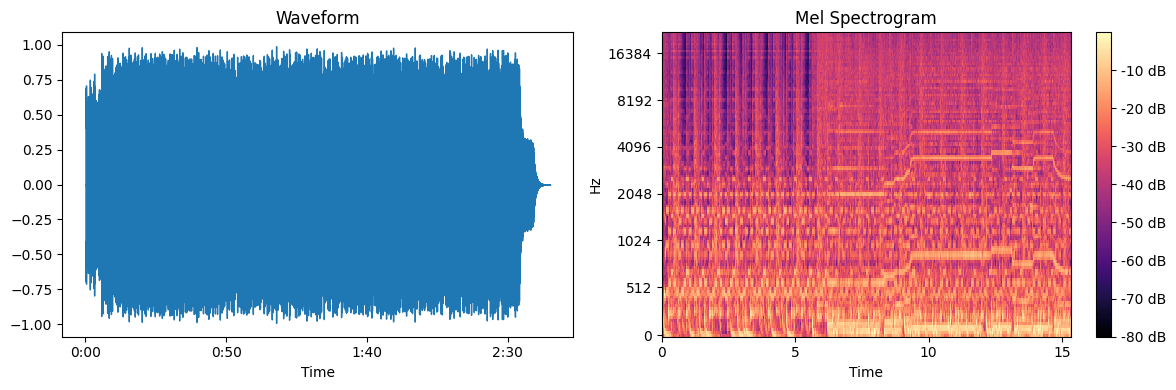

In [ ]:
import os
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# โหลดโมเดลที่ฝึกไว้
model = load_model("model.h5")
print("✅ โหลดโมเดลสำเร็จ")

# ฟังก์ชันแปลงไฟล์เสียงเป็น Mel Spectrogram
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return y, sr, log_mel_spec

# ระบุพาธไฟล์เสียงที่ต้องการทดสอบ
test_audio = "A Little Bit Deeper - Jeremy Korpas.mp3"  # แก้เป็นไฟล์ที่ต้องการ

if not os.path.exists(test_audio):
    raise ValueError(f"❌ ไม่พบไฟล์ {test_audio} โปรดตรวจสอบพาธอีกครั้ง")

# ดึง features จากไฟล์เสียง
y, sr, mel_spec = extract_features(test_audio)

# แสดงขนาดของ Mel Spectrogram ก่อนการ Padding
print(f"ขนาดของ Mel Spectrogram ก่อน Padding: {mel_spec.shape}")

# ปรับขนาด max_len ให้เหมาะสมกับข้อมูลที่ใช้ฝึกโมเดล
max_len = 1320  # ขนาดความยาวที่โมเดลคาดหวัง

# ทำการ Padding หรือครอบขนาดให้ตรงกับ max_len
if mel_spec.shape[1] < max_len:
    mel_spec = np.pad(mel_spec, ((0, 0), (0, max_len - mel_spec.shape[1])))
elif mel_spec.shape[1] > max_len:
    mel_spec = mel_spec[:, :max_len]

# แสดงขนาดของ Mel Spectrogram หลังจาก Padding
print(f"ขนาดของ Mel Spectrogram หลัง Padding: {mel_spec.shape}")

# ปรับขนาดให้เหมาะสมกับโมเดล
mel_spec = mel_spec[..., np.newaxis]  # เพิ่มมิติที่ 3 (channels) ให้กับข้อมูล

# ตรวจสอบข้อมูล
print(f"ข้อมูลหลังปรับขนาด: {mel_spec.shape}")

# ทำการทำนาย
prediction = model.predict(np.expand_dims(mel_spec, axis=0))[0][0]

# แสดงผลลัพธ์เป็นเปอร์เซ็นต์
speech_prob = prediction * 100
music_prob = (1 - prediction) * 100
print(f"🔊 ผลการทำนาย: Speech {speech_prob:.2f}% | Music {music_prob:.2f}%")

# การแสดงคลื่นเสียง (Waveform)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

# การแสดง Mel Spectrogram
# การแสดง Mel Spectrogram
plt.subplot(1, 2, 2)
librosa.display.specshow(mel_spec[:, :, 0], x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')


plt.tight_layout()
plt.show()
